In [1]:
library('tidyverse')
library('tidyr')
library('ggplot2')
library('Amelia')
library("e1071")
library('GGally')
library('ggExtra')

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'Amelia' was built under R version 3.6.1"
Loading required package: Rcpp

## 
## Amelia II: Multipl

In [2]:
data <- read.csv('Du lieu cung cap/attitude.csv')

In [3]:
head(data)

,rating,complaints,privileges,learning,raises,critical,advance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


In [4]:
str(data)

'data.frame':	30 obs. of  7 variables:
 $ rating    : int  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: int  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: int  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : int  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : int  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : int  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : int  45 47 48 35 47 34 35 41 31 41 ...


In [5]:
#2.
print(paste('Number of rows ',toString(nrow(data)),'; Number of columns ',toString(ncol(data))))

[1] "Number of rows  30 ; Number of columns  7"


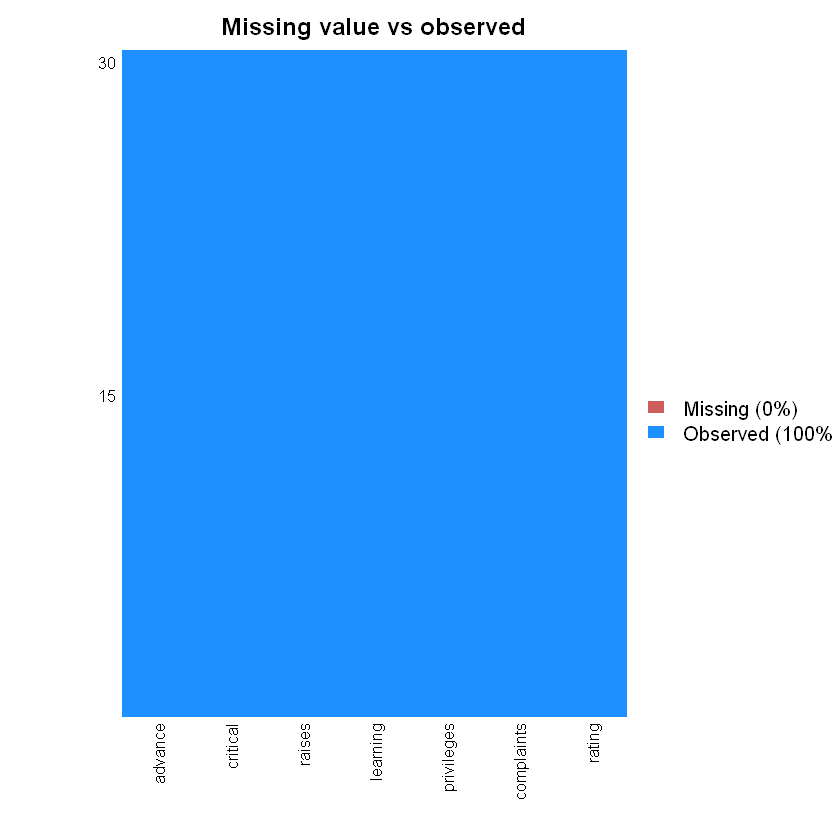

In [6]:
#3.
missmap(data, main='Missing value vs observed')

Không có Missing Value

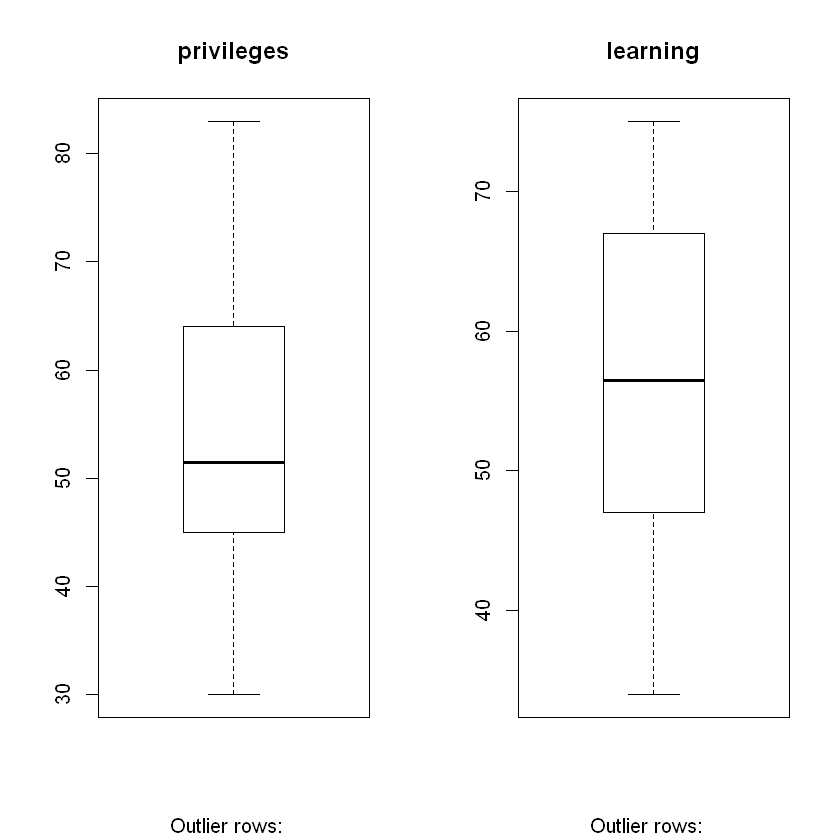

In [7]:
par(mfrow=c(1,2))
boxplot(data$privileges, main='privileges', 
  sub=paste('Outlier rows: ',toString(boxplot.stats(data$privileges)$out)))
boxplot(data$learning, main='learning', 
  sub=paste('Outlier rows: ',toString(boxplot.stats(data$learning)$out)))

privileges & learning  Không có Outlers luôn

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



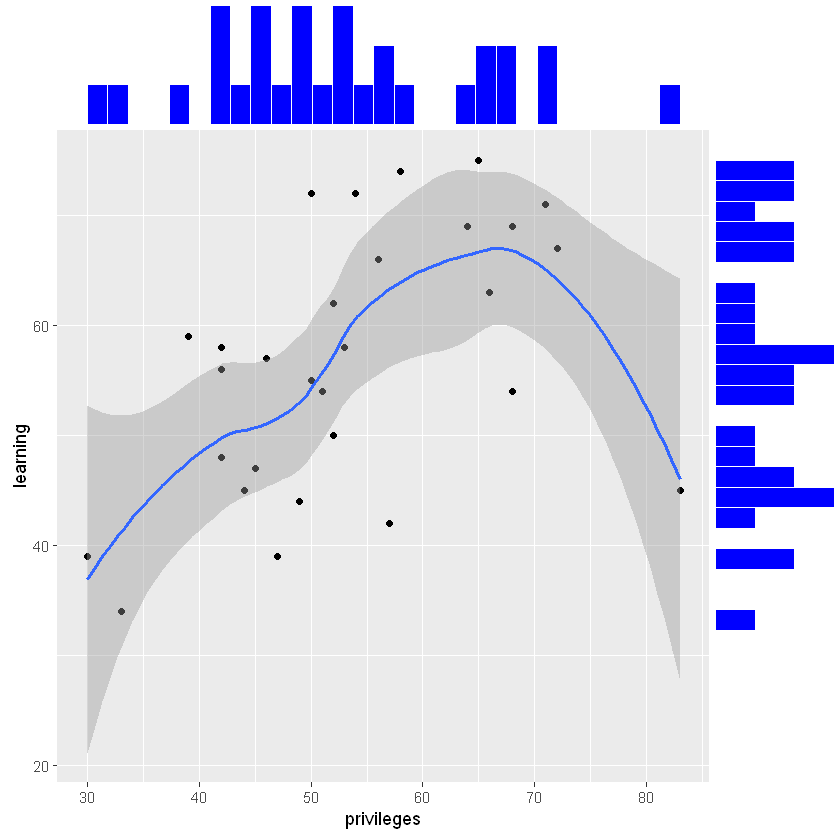

In [8]:
# 4
library('ggExtra')
plot <- ggplot(data,aes(x=privileges, y=learning)) + geom_point() + geom_smooth() 
ggMarginal(plot, type='hist', col='white', fill='blue')

- privileges và learning có vẻ có sự tương quan

In [9]:
cor(data$privileges,data$learning)

[1] 0.493331

In [10]:
# 5.
# data[,3:4]

In [11]:
wss <- (nrow(data)-1) * (sum(apply(data[,3:4],2,var)))
print(wss)

[1] 8336.433


In [12]:
for (i in 1:10) wss[i] = sum(kmeans(data[, 3:4], centers=i, nstart=20)$withinss)

In [13]:
print(wss)

 [1] 8336.4333 3652.7059 2669.3422 1799.2222 1300.1250  874.4583  697.7976
 [8]  540.7643  412.4667  343.8833


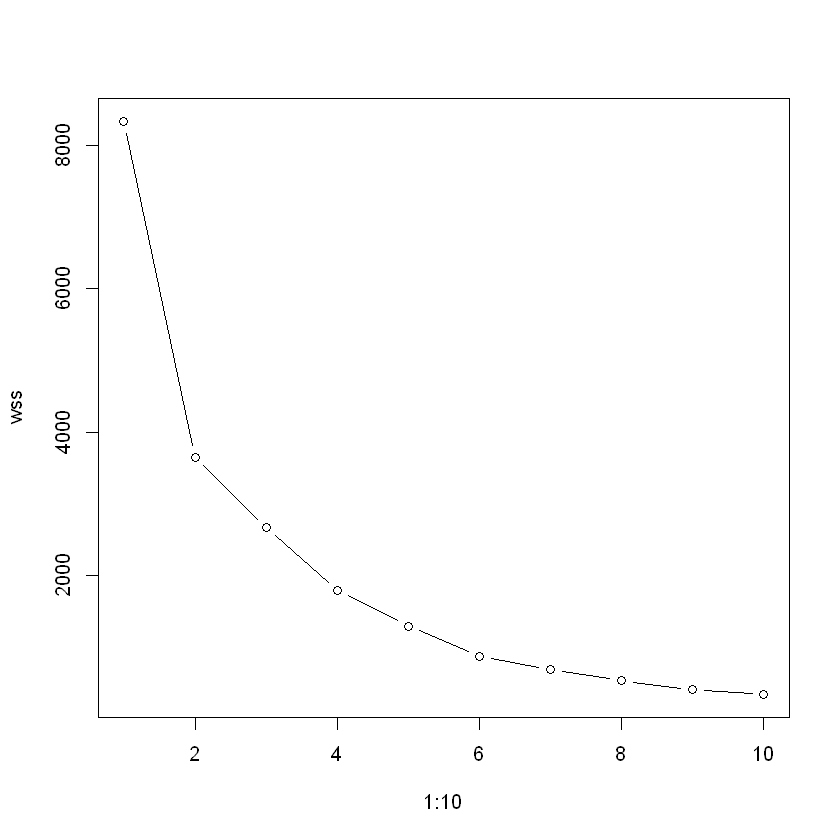

In [14]:
plot(1:10, wss, type='b')

- Chọn k=4

In [15]:
#6.
dataCluster <- kmeans(data[,3:4], centers=4,nstart=20)
print(dataCluster)

K-means clustering with 4 clusters of sizes 9, 9, 10, 2

Cluster means:
  privileges learning
1   47.44444 56.55556
2   43.55556 42.77778
3   62.40000 69.80000
4   75.50000 49.50000

Clustering vector:
 [1] 2 1 3 2 3 2 1 1 3 2 1 2 2 4 3 3 3 3 1 4 2 1 1 1 2 3 3 2 3 1

Within cluster sum of squares by cluster:
[1] 316.4444 699.7778 630.0000 153.0000
 (between_SS / total_SS =  78.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


- 4 cụm
 privileges learning
1   75.50000 49.50000
2   47.44444 56.55556
3   43.55556 42.77778
4   62.40000 69.80000

In [16]:
print(dataCluster$totss)

[1] 8336.433


In [17]:
print(dataCluster$betweenss/dataCluster$totss)

[1] 0.7841736


In [18]:
#7.
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.6.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



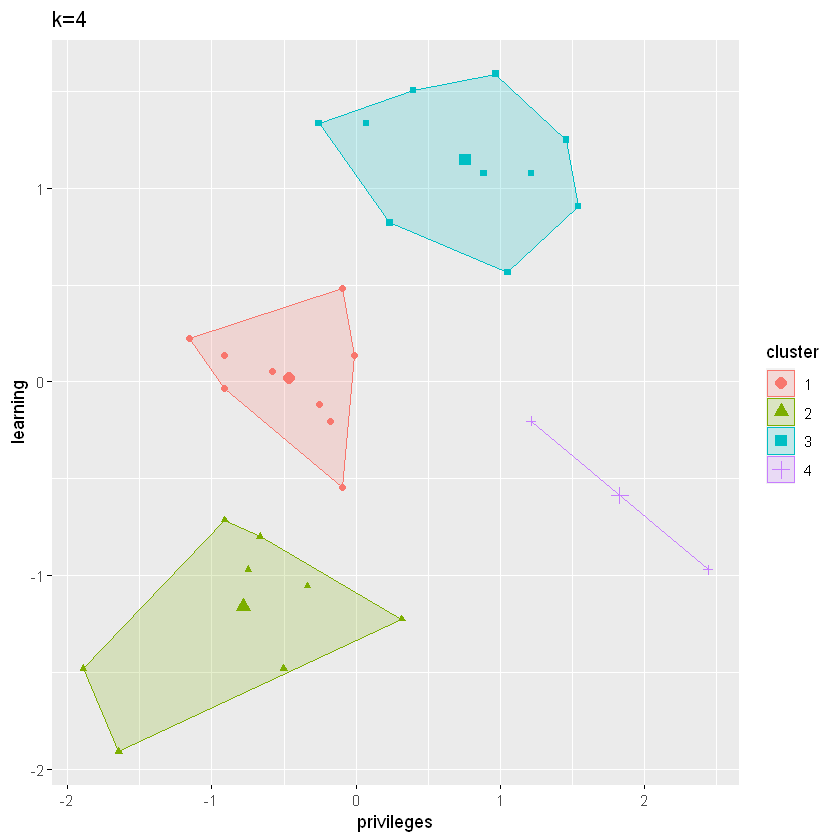

In [19]:
fviz_cluster(dataCluster, geom='point', data=data[,3:4]) + ggtitle('k=4')

Cụm 4 với privileges learning lần lượt 62.40000 69.80000 khá ít phần tử
Phân thành 4 cụm khá hợp lý

In [20]:
#8.

Phân cụm dựa vào privileges & learning giải thích được 78.4 % dữ liệu

In [21]:
# done